In [1]:
import pandas as pd
import json
import os

import pandas as pd
import pygwalker as pyg
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
peter = pd.read_csv("../peter.csv", index_col=0)
sirui_1 = pd.read_csv("../sirui_1.csv", index_col=0)
sirui_2 = pd.read_csv("../sirui_2.csv", index_col=0)

# Combine the two dataframes
df = pd.concat([peter, sirui_1, sirui_2], ignore_index=True)
# Fill NaN with "no"
df = df.fillna("no")

df.to_csv("../combined_results.csv")

In [101]:
df = pd.read_csv("../combined_results.csv", index_col=0)

In [4]:
import pandas as pd

# Creating the fake dataset
data = {
    'Normalization': ['None']*5 + ['TPM']*5 + ['FPKM']*5 + ['None']*5 + ['TPM']*5,
    'APOE': [True]*5 + [False]*5 + [True]*5 + [False]*5 + [True]*5,
    'Gene Subset': ['All']*5 + ['HUG']*5 + ['Up/down-regulated']*5 + ['All']*5 + ['HUG']*5,
    'Model': ['Decision Tree']*5 + ['Naive Bayes']*5 + ['Random Forest']*5 + ['Logistic Regression']*5 + ['XGBoost']*5,
    'Regularization': ['None']*15 + ['L1']*5 + ['L2']*5,
    'Fold': [1, 2, 3, 4, 5]*5,
    'Accuracy': [0.85, 0.84, 0.86, 0.85, 0.84, 0.75, 0.76, 0.74, 0.75, 0.75, 0.90, 0.91, 0.89, 0.90, 0.91, 0.80, 0.79, 0.81, 0.80, 0.79, 0.88, 0.87, 0.89, 0.88, 0.87],
    'AUC': [0.88, 0.87, 0.89, 0.88, 0.87, 0.78, 0.79, 0.77, 0.78, 0.78, 0.92, 0.93, 0.91, 0.92, 0.93, 0.83, 0.82, 0.84, 0.83, 0.82, 0.90, 0.89, 0.91, 0.90, 0.89],
    'F1': [0.83, 0.82, 0.84, 0.83, 0.82, 0.74, 0.75, 0.73, 0.74, 0.74, 0.89, 0.90, 0.88, 0.89, 0.90, 0.81, 0.80, 0.82, 0.81, 0.80, 0.87, 0.86, 0.88, 0.87, 0.86],
    'MCC': [0.80, 0.79, 0.81, 0.80, 0.79, 0.70, 0.71, 0.69, 0.70, 0.70, 0.87, 0.88, 0.86, 0.87, 0.88, 0.77, 0.76, 0.78, 0.77, 0.76, 0.85, 0.84, 0.86, 0.85, 0.84],
    'Recall': [0.82, 0.81, 0.83, 0.82, 0.81, 0.72, 0.73, 0.71, 0.72, 0.72, 0.88, 0.89, 0.87, 0.88, 0.89, 0.79, 0.78, 0.80, 0.79, 0.78, 0.86, 0.85, 0.87, 0.86, 0.85]
}

df = pd.DataFrame(data)
df.head()


Normalization  APOE Gene Subset          Model Regularization  Fold  \
0          None  True         All  Decision Tree           None     1   
1          None  True         All  Decision Tree           None     2   
2          None  True         All  Decision Tree           None     3   
3          None  True         All  Decision Tree           None     4   
4          None  True         All  Decision Tree           None     5   

   Accuracy   AUC    F1   MCC  Recall  
0      0.85  0.88  0.83  0.80    0.82  
1      0.84  0.87  0.82  0.79    0.81  
2      0.86  0.89  0.84  0.81    0.83  
3      0.85  0.88  0.83  0.80    0.82  
4      0.84  0.87  0.82  0.79    0.81

In [57]:
df.head()

Model Normalization   APOE Gene Subset  Fold  Accuracy       AUC        F1  \
0    DT         count  False       total     1  0.761194  0.760714  0.771429   
1    DT         count  False       total     2  0.686567  0.691016  0.666667   
2    DT         count  False       total     3  0.552239  0.552778  0.500000   
3    DT         count  False       total     4  0.701493  0.693798  0.756098   
4    DT         count  False       total     5  0.742424  0.733333  0.779221   

        MCC    Recall Penalty  
0  0.521429  0.771429      no  
1  0.378612  0.724138      no  
2  0.103561  0.555556      no  
3  0.376798  0.720930      no  
4  0.479023  0.833333      no

## Model Comparison

In [82]:
# Calculate mean and standard deviation values for each model
df_grouped = df.groupby('Model').agg(
    Accuracy_mean=('Accuracy', 'mean'), Accuracy_std=('Accuracy', 'std'),
    F1_mean=('F1', 'mean'), F1_std=('F1', 'std'),
    AUC_mean=('AUC', 'mean'), AUC_std=('AUC', 'std'),
    MCC_mean=('MCC', 'mean'), MCC_std=('MCC', 'std'),
    Recall_mean=('Recall', 'mean'), Recall_std=('Recall', 'std')
).reset_index()

# Plotting the bar plot
fig, ax = plt.subplots(figsize=(21, 6))

metrics = ['Accuracy', 'F1', 'AUC', 'MCC', 'Recall']
colors = sns.color_palette("Set2", len(metrics))
error_kw = dict(ecolor='black', lw=1, capsize=5, capthick=1)

bar_width = 0.15
index = np.arange(len(df_grouped))

for i, metric in enumerate(metrics):
    means = df_grouped[f'{metric}_mean']
    stds = df_grouped[f'{metric}_std']
    ax.bar(index + i * bar_width, means, bar_width, yerr=stds, label=metric, color=colors[i], error_kw=error_kw)

# Adding labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Value')
ax.set_title('Evaluation Metrics for Different Models')
ax.set_xticks(index + (bar_width * (len(metrics) - 1) / 2))
ax.set_xticklabels(df_grouped['Model'])
ax.legend()
plt.grid(False)
plt.tight_layout()
# Save the plot at 400 dpi
plt.savefig('bar_plot.png', dpi=400)

plt.show()

In [102]:
# df keep only Normalization = count
df_filtered = df[df['Normalization'] == 'count']
# df_filtered keep only APOE = True
df_filtered = df_filtered[df_filtered['APOE'] == True]
# df_filtered keep only Gene Subset = total
df_filtered = df_filtered[df_filtered['Gene Subset'] == 'total']

In [104]:
# Keep only Logistic Regression
df_filtered = df_filtered[df_filtered['Model'] == 'logistic regression']

In [113]:
df_filtered
# Calculate mean and standard deviation values for each Penalty
df_grouped = df_filtered.groupby('Model').agg(
    Accuracy_mean=('Accuracy', 'mean'),
    F1_mean=('F1', 'mean'),
    AUC_mean=('AUC', 'mean'),
    MCC_mean=('MCC', 'mean'),
    Recall_mean=('Recall', 'mean'),
).reset_index()

In [114]:
df_grouped

Model  Accuracy_mean   F1_mean  AUC_mean  MCC_mean  \
0  logistic regression       0.810523  0.810186   0.89875  0.619172   

   Recall_mean  
0     0.812693

In [96]:
# Calculate mean and standard deviation values for each model
df_filtered_grouped = df_filtered.groupby('Model').agg(
    Accuracy_mean=('Accuracy', 'mean'), Accuracy_std=('Accuracy', 'std'),
    F1_mean=('F1', 'mean'), F1_std=('F1', 'std'),
    AUC_mean=('AUC', 'mean'), AUC_std=('AUC', 'std'),
    MCC_mean=('MCC', 'mean'), MCC_std=('MCC', 'std'),
    Recall_mean=('Recall', 'mean'), Recall_std=('Recall', 'std')
).reset_index()

# Plotting the bar plot
fig, ax = plt.subplots(figsize=(21, 6))

metrics = ['Accuracy', 'F1', 'AUC', 'MCC', 'Recall']
colors = sns.color_palette("Set2", len(metrics))
error_kw = dict(ecolor='black', lw=1, capsize=5, capthick=1)

bar_width = 0.15
index = np.arange(len(df_filtered_grouped))

for i, metric in enumerate(metrics):
    means = df_filtered_grouped[f'{metric}_mean']
    stds = df_filtered_grouped[f'{metric}_std']
    ax.bar(index + i * bar_width, means, bar_width, yerr=stds, label=metric, color=colors[i], error_kw=error_kw)

# Adding labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Value')
ax.set_title('Evaluation Metrics for Different Models (Count Normalization, APOE=True, Gene Subset=Total)')
ax.set_xticks(index + (bar_width * (len(metrics) - 1) / 2))
ax.set_xticklabels(df_filtered_grouped['Model'])
ax.legend()
plt.grid(False)
plt.tight_layout()
# Save the plot at 400 dpi
plt.savefig('bar_plot_filtered.png', dpi=400)

plt.show()

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is already created and loaded with the dataset

# Define custom colors for the boxes
colors_norm = ['#1f77b4', '#ff7f0e', '#2ca02c']
colors_apoe = ['#9467bd', '#8c564b']
colors_gene = ['#e377c2', '#7f7f7f', '#bcbd22']

# Setting up the figure with 3 rows for the three metrics
fig, axes = plt.subplots(5, 3, figsize=(18, 30), sharey='row')

# Plot for Accuracy
sns.boxplot(x='Normalization', y='Accuracy', data=df, ax=axes[0, 0], palette=colors_norm)
axes[0, 0].set_title('Accuracy by Normalization Method')
axes[0, 0].set_xlabel('Normalization')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].grid(False)

sns.boxplot(x='APOE', y='Accuracy', data=df, ax=axes[0, 1], palette=colors_apoe)
axes[0, 1].set_title('Accuracy by APOE Status')
axes[0, 1].set_xlabel('APOE')
axes[0, 1].set_xticks([0, 1])
axes[0, 1].set_xticklabels(['False', 'True'])
axes[0, 1].grid(False)

sns.boxplot(x='Gene Subset', y='Accuracy', data=df, ax=axes[0, 2], palette=colors_gene)
axes[0, 2].set_title('Accuracy by Gene Subset')
axes[0, 2].set_xlabel('Gene Subset')
axes[0, 2].grid(False)

# Plot for F1 Score
sns.boxplot(x='Normalization', y='F1', data=df, ax=axes[1, 0], palette=colors_norm)
axes[1, 0].set_title('F1 Score by Normalization Method')
axes[1, 0].set_xlabel('Normalization')
axes[1, 0].set_ylabel('F1 Score')
axes[1, 0].grid(False)

sns.boxplot(x='APOE', y='F1', data=df, ax=axes[1, 1], palette=colors_apoe)
axes[1, 1].set_title('F1 Score by APOE Status')
axes[1, 1].set_xlabel('APOE')
axes[1, 1].set_xticks([0, 1])
axes[1, 1].set_xticklabels(['False', 'True'])
axes[1, 1].grid(False)

sns.boxplot(x='Gene Subset', y='F1', data=df, ax=axes[1, 2], palette=colors_gene)
axes[1, 2].set_title('F1 Score by Gene Subset')
axes[1, 2].set_xlabel('Gene Subset')
axes[1, 2].grid(False)

# Plot for AUC
sns.boxplot(x='Normalization', y='AUC', data=df, ax=axes[2, 0], palette=colors_norm)
axes[2, 0].set_title('AUC by Normalization Method')
axes[2, 0].set_xlabel('Normalization')
axes[2, 0].set_ylabel('AUC')
axes[2, 0].grid(False)

sns.boxplot(x='APOE', y='AUC', data=df, ax=axes[2, 1], palette=colors_apoe)
axes[2, 1].set_title('AUC by APOE Status')
axes[2, 1].set_xlabel('APOE')
axes[2, 1].set_xticks([0, 1])
axes[2, 1].set_xticklabels(['False', 'True'])
axes[2, 1].grid(False)

sns.boxplot(x='Gene Subset', y='AUC', data=df, ax=axes[2, 2], palette=colors_gene)
axes[2, 2].set_title('AUC by Gene Subset')
axes[2, 2].set_xlabel('Gene Subset')
axes[2, 2].grid(False)

# # Plot for MCC
# sns.boxplot(x='Normalization', y='MCC', data=df, ax=axes[3, 0], palette=colors_norm)
# axes[3, 0].set_title('MCC by Normalization Method')
# axes[3, 0].set_xlabel('Normalization')
# axes[3, 0].set_ylabel('MCC')
# axes[3, 0].grid(False)

# sns.boxplot(x='APOE', y='MCC', data=df, ax=axes[3, 1], palette=colors_apoe)
# axes[3, 1].set_title('MCC by APOE Status')
# axes[3, 1].set_xlabel('APOE')
# axes[3, 1].set_xticks([0, 1])
# axes[3, 1].set_xticklabels(['False', 'True'])
# axes[3, 1].grid(False)

# sns.boxplot(x='Gene Subset', y='MCC', data=df, ax=axes[3, 2], palette=colors_gene)
# axes[3, 2].set_title('MCC by Gene Subset')
# axes[3, 2].set_xlabel('Gene Subset')
# axes[3, 2].grid(False)

# # Plot for Recall
# sns.boxplot(x='Normalization', y='Recall', data=df, ax=axes[4, 0], palette=colors_norm)
# axes[4, 0].set_title('Recall by Normalization Method')
# axes[4, 0].set_xlabel('Normalization')
# axes[4, 0].set_ylabel('Recall')
# axes[4, 0].grid(False)

# sns.boxplot(x='APOE', y='Recall', data=df, ax=axes[4, 1], palette=colors_apoe)
# axes[4, 1].set_title('Recall by APOE Status')
# axes[4, 1].set_xlabel('APOE')
# axes[4, 1].set_xticks([0, 1])
# axes[4, 1].set_xticklabels(['False', 'True'])
# axes[4, 1].grid(False)

# sns.boxplot(x='Gene Subset', y='Recall', data=df, ax=axes[4, 2], palette=colors_gene)
# axes[4, 2].set_title('Recall by Gene Subset')
# axes[4, 2].set_xlabel('Gene Subset')
# axes[4, 2].grid(False)

# Adjust the layout
plt.tight_layout()

# Save the plot 400 dpi
plt.savefig('boxplot_metrics.png', dpi=400)

# Show the plot
plt.show()


/var/folders/sj/lmgylxc17t39pj1ckmq9w5bw0000gn/T/ipykernel_27176/1082443754.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Normalization', y='Accuracy', data=df, ax=axes[0, 0], palette=colors_norm)
/var/folders/sj/lmgylxc17t39pj1ckmq9w5bw0000gn/T/ipykernel_27176/1082443754.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='APOE', y='Accuracy', data=df, ax=axes[0, 1], palette=colors_apoe)
/var/folders/sj/lmgylxc17t39pj1ckmq9w5bw0000gn/T/ipykernel_27176/1082443754.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gene Subse

## Data Overview

In [18]:
meta_burgos_path = "../datasets/datasets_raw/burgos_dbgap/burgos_dbgap_metadata.xlsx"
meta_burgos = pd.read_excel(meta_burgos_path)

meta_silver_path = "../datasets/datasets_raw/silver_seq/silver_seq_metadata.xlsx"
meta_silver = pd.read_excel(meta_silver_path)

meta_toden_path = "../datasets/datasets_raw/toden/toden_metadata.xlsx"
meta_toden = pd.read_excel(meta_toden_path)

In [24]:
meta_burgos["ClinicalDXSummary"].value_counts()

ClinicalDXSummary
Control                138
Alzheimer's disease    129
Name: count, dtype: int64

In [28]:
meta_silver["donor_group"].value_counts()

donor_group
AD    74
N     41
Name: count, dtype: int64

In [30]:
meta_toden["Disease"].value_counts()

Disease
AD     170
NCI    164
Name: count, dtype: int64

/var/folders/sj/lmgylxc17t39pj1ckmq9w5bw0000gn/T/ipykernel_27176/3944640862.py:19: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.countplot(data=df, x='Dataset', hue='Donors', palette=palette)


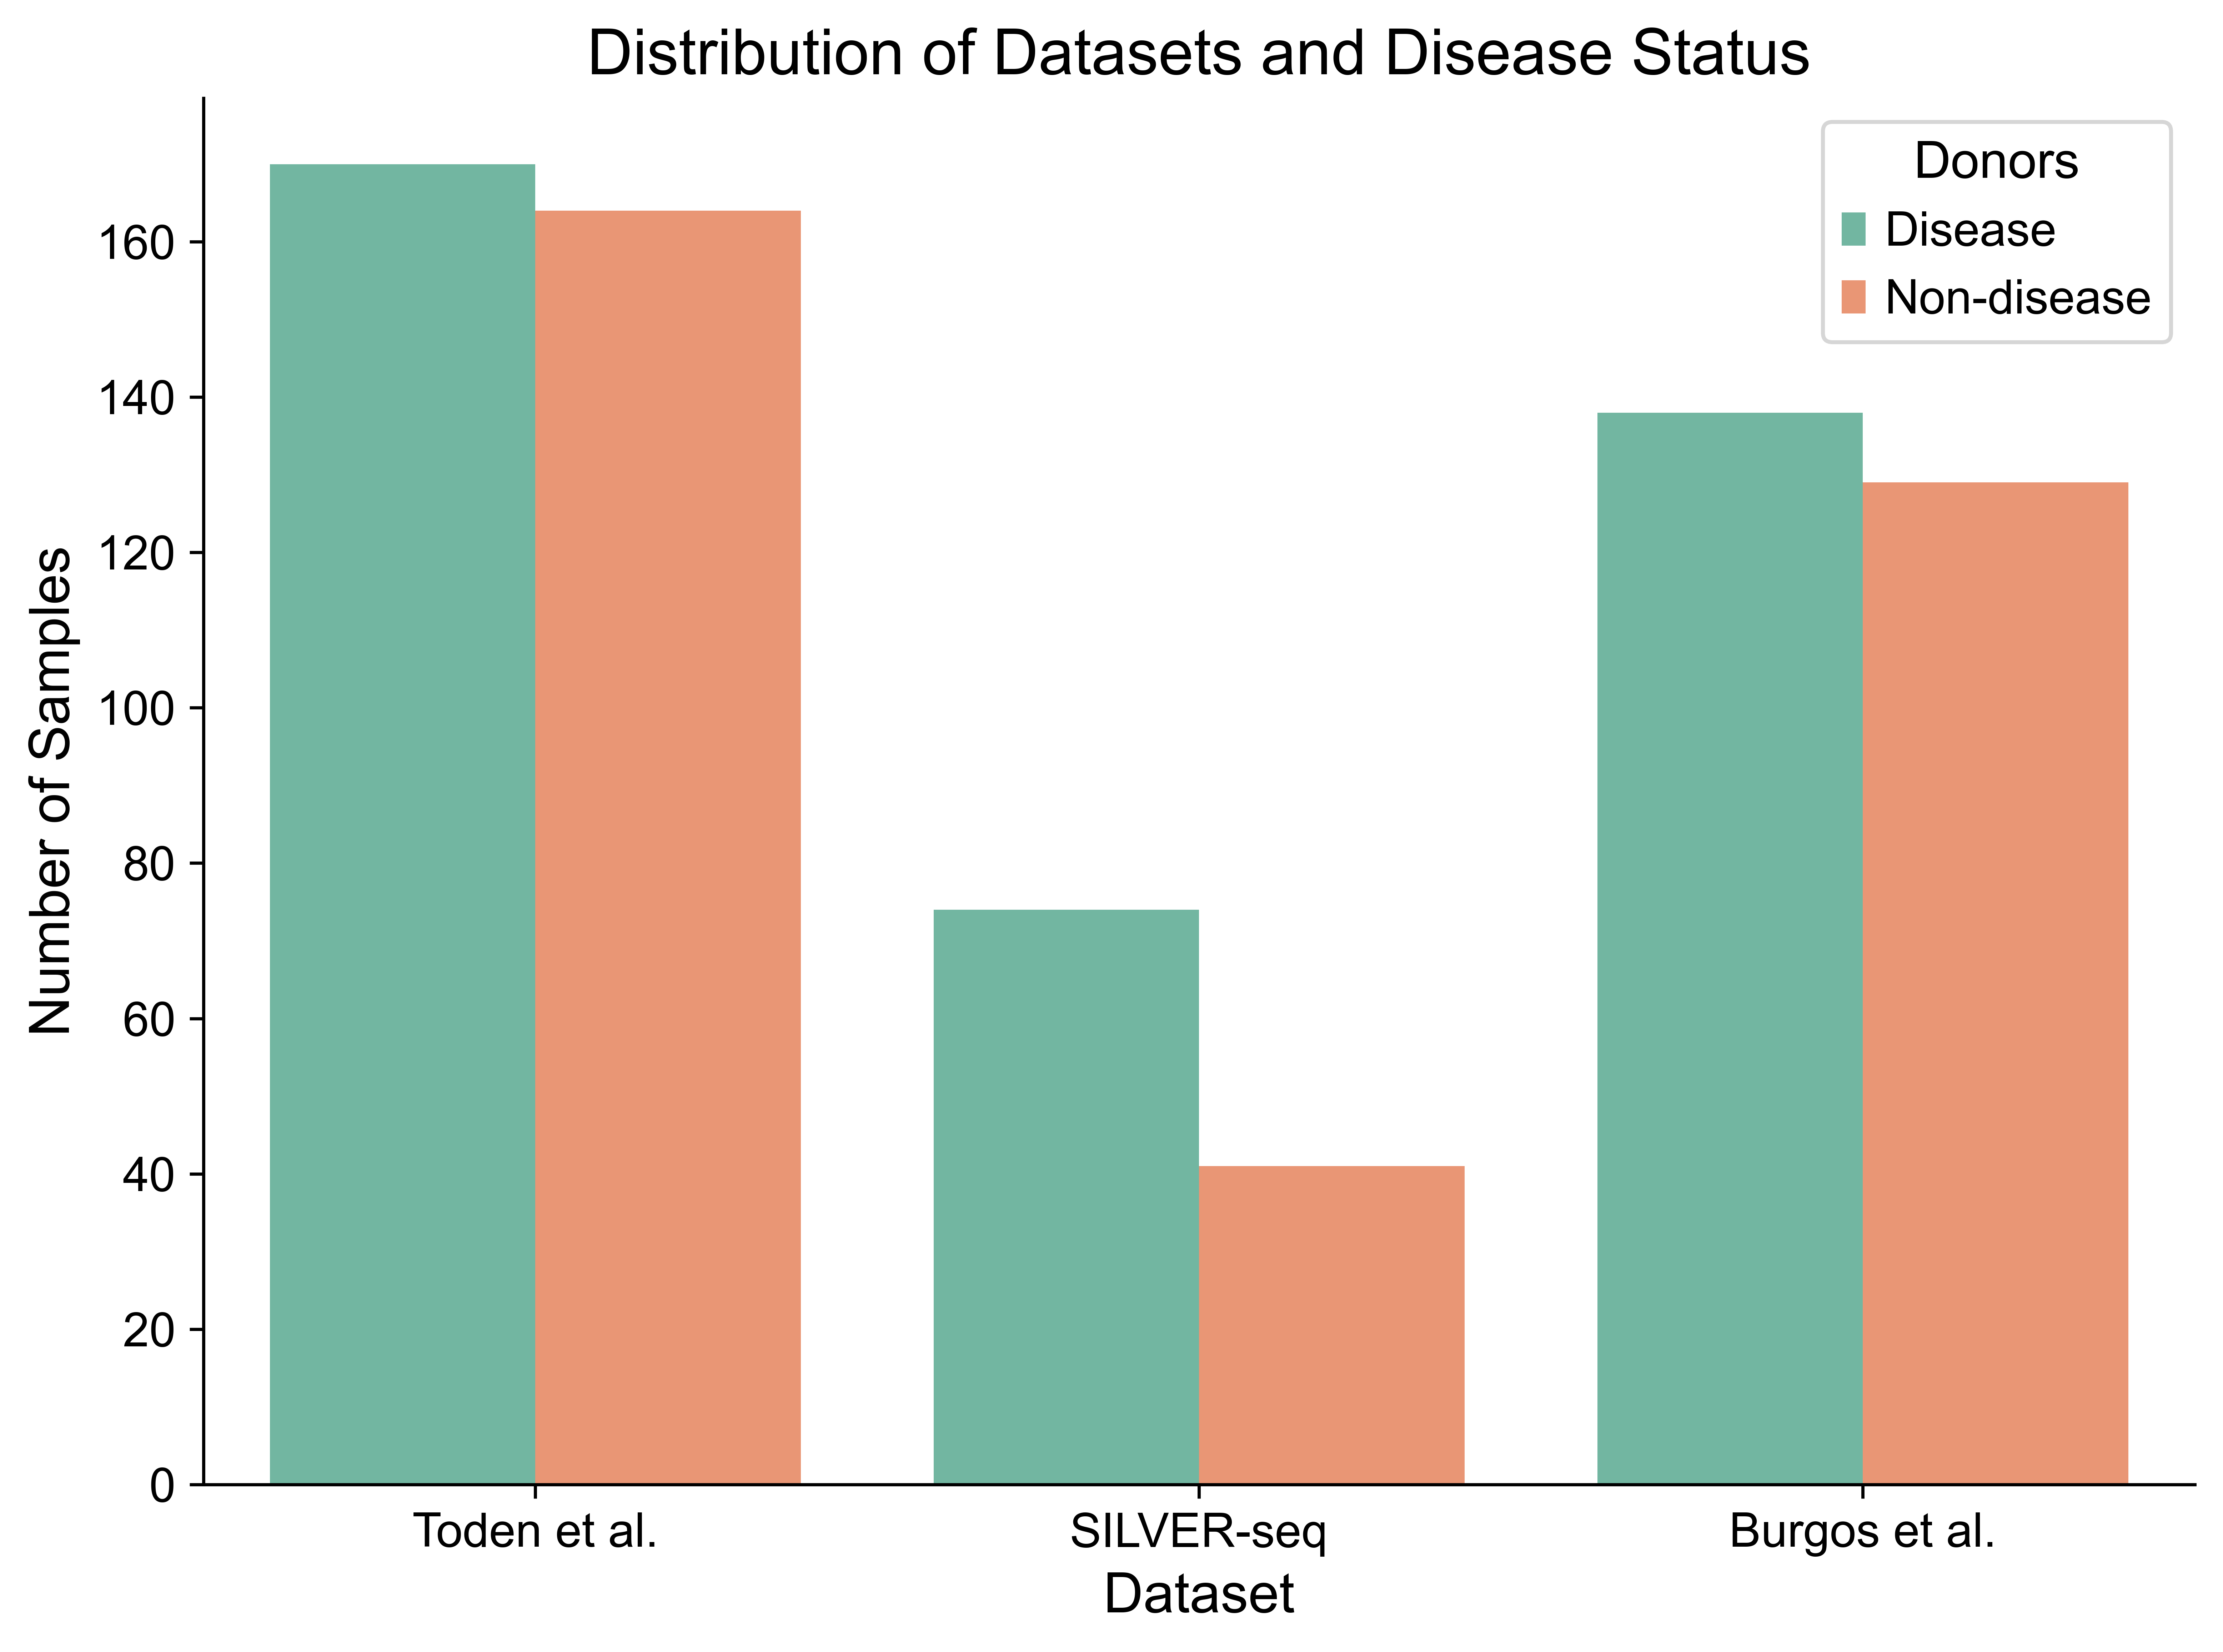

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Create a DataFrame with fake data
data = {
    'Dataset': ['Toden et al.'] * 334 + ['SILVER-seq'] * 115 + ['Burgos et al.'] * 267,
    'Donors': ['Disease'] * 170 + ['Non-disease'] * 164 + ['Disease'] * 74 + ['Non-disease'] * 41 + ['Disease'] * 138 + ['Non-disease'] * 129
}

df = pd.DataFrame(data)

# Set the color palette
palette = sns.color_palette("Set2")

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Dataset', hue='Donors', palette=palette)
plt.title('Distribution of Datasets and Disease Status', fontsize=16)
plt.xlabel('Dataset', fontsize=14)
plt.ylabel('Number of Samples', fontsize=14)
plt.legend(title='Donors', title_fontsize='13', fontsize='12')
sns.despine()  # Remove top and right spines for a cleaner look
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.grid(False)
# Save the plot with 400 dpi resolution
plt.savefig('dataset_distribution.png', dpi=400)
plt.show()

## UMAP for Toden

In [39]:
import scanpy as sc

adata_toden_fpkm = sc.read("../datasets/datasets_h5ad/fpkm/toden_fpkm.h5ad")

adata_toden_fpkm.obs = adata_toden_fpkm.obs[["Disease"]]

adata_toden_fpkm.obs["AD"] = ["No Disease" if x == "NCI" else "Disease" for x in adata_toden_fpkm.obs["Disease"]]


/opt/homebrew/Caskroom/miniconda/base/envs/CSE_283/lib/python3.11/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


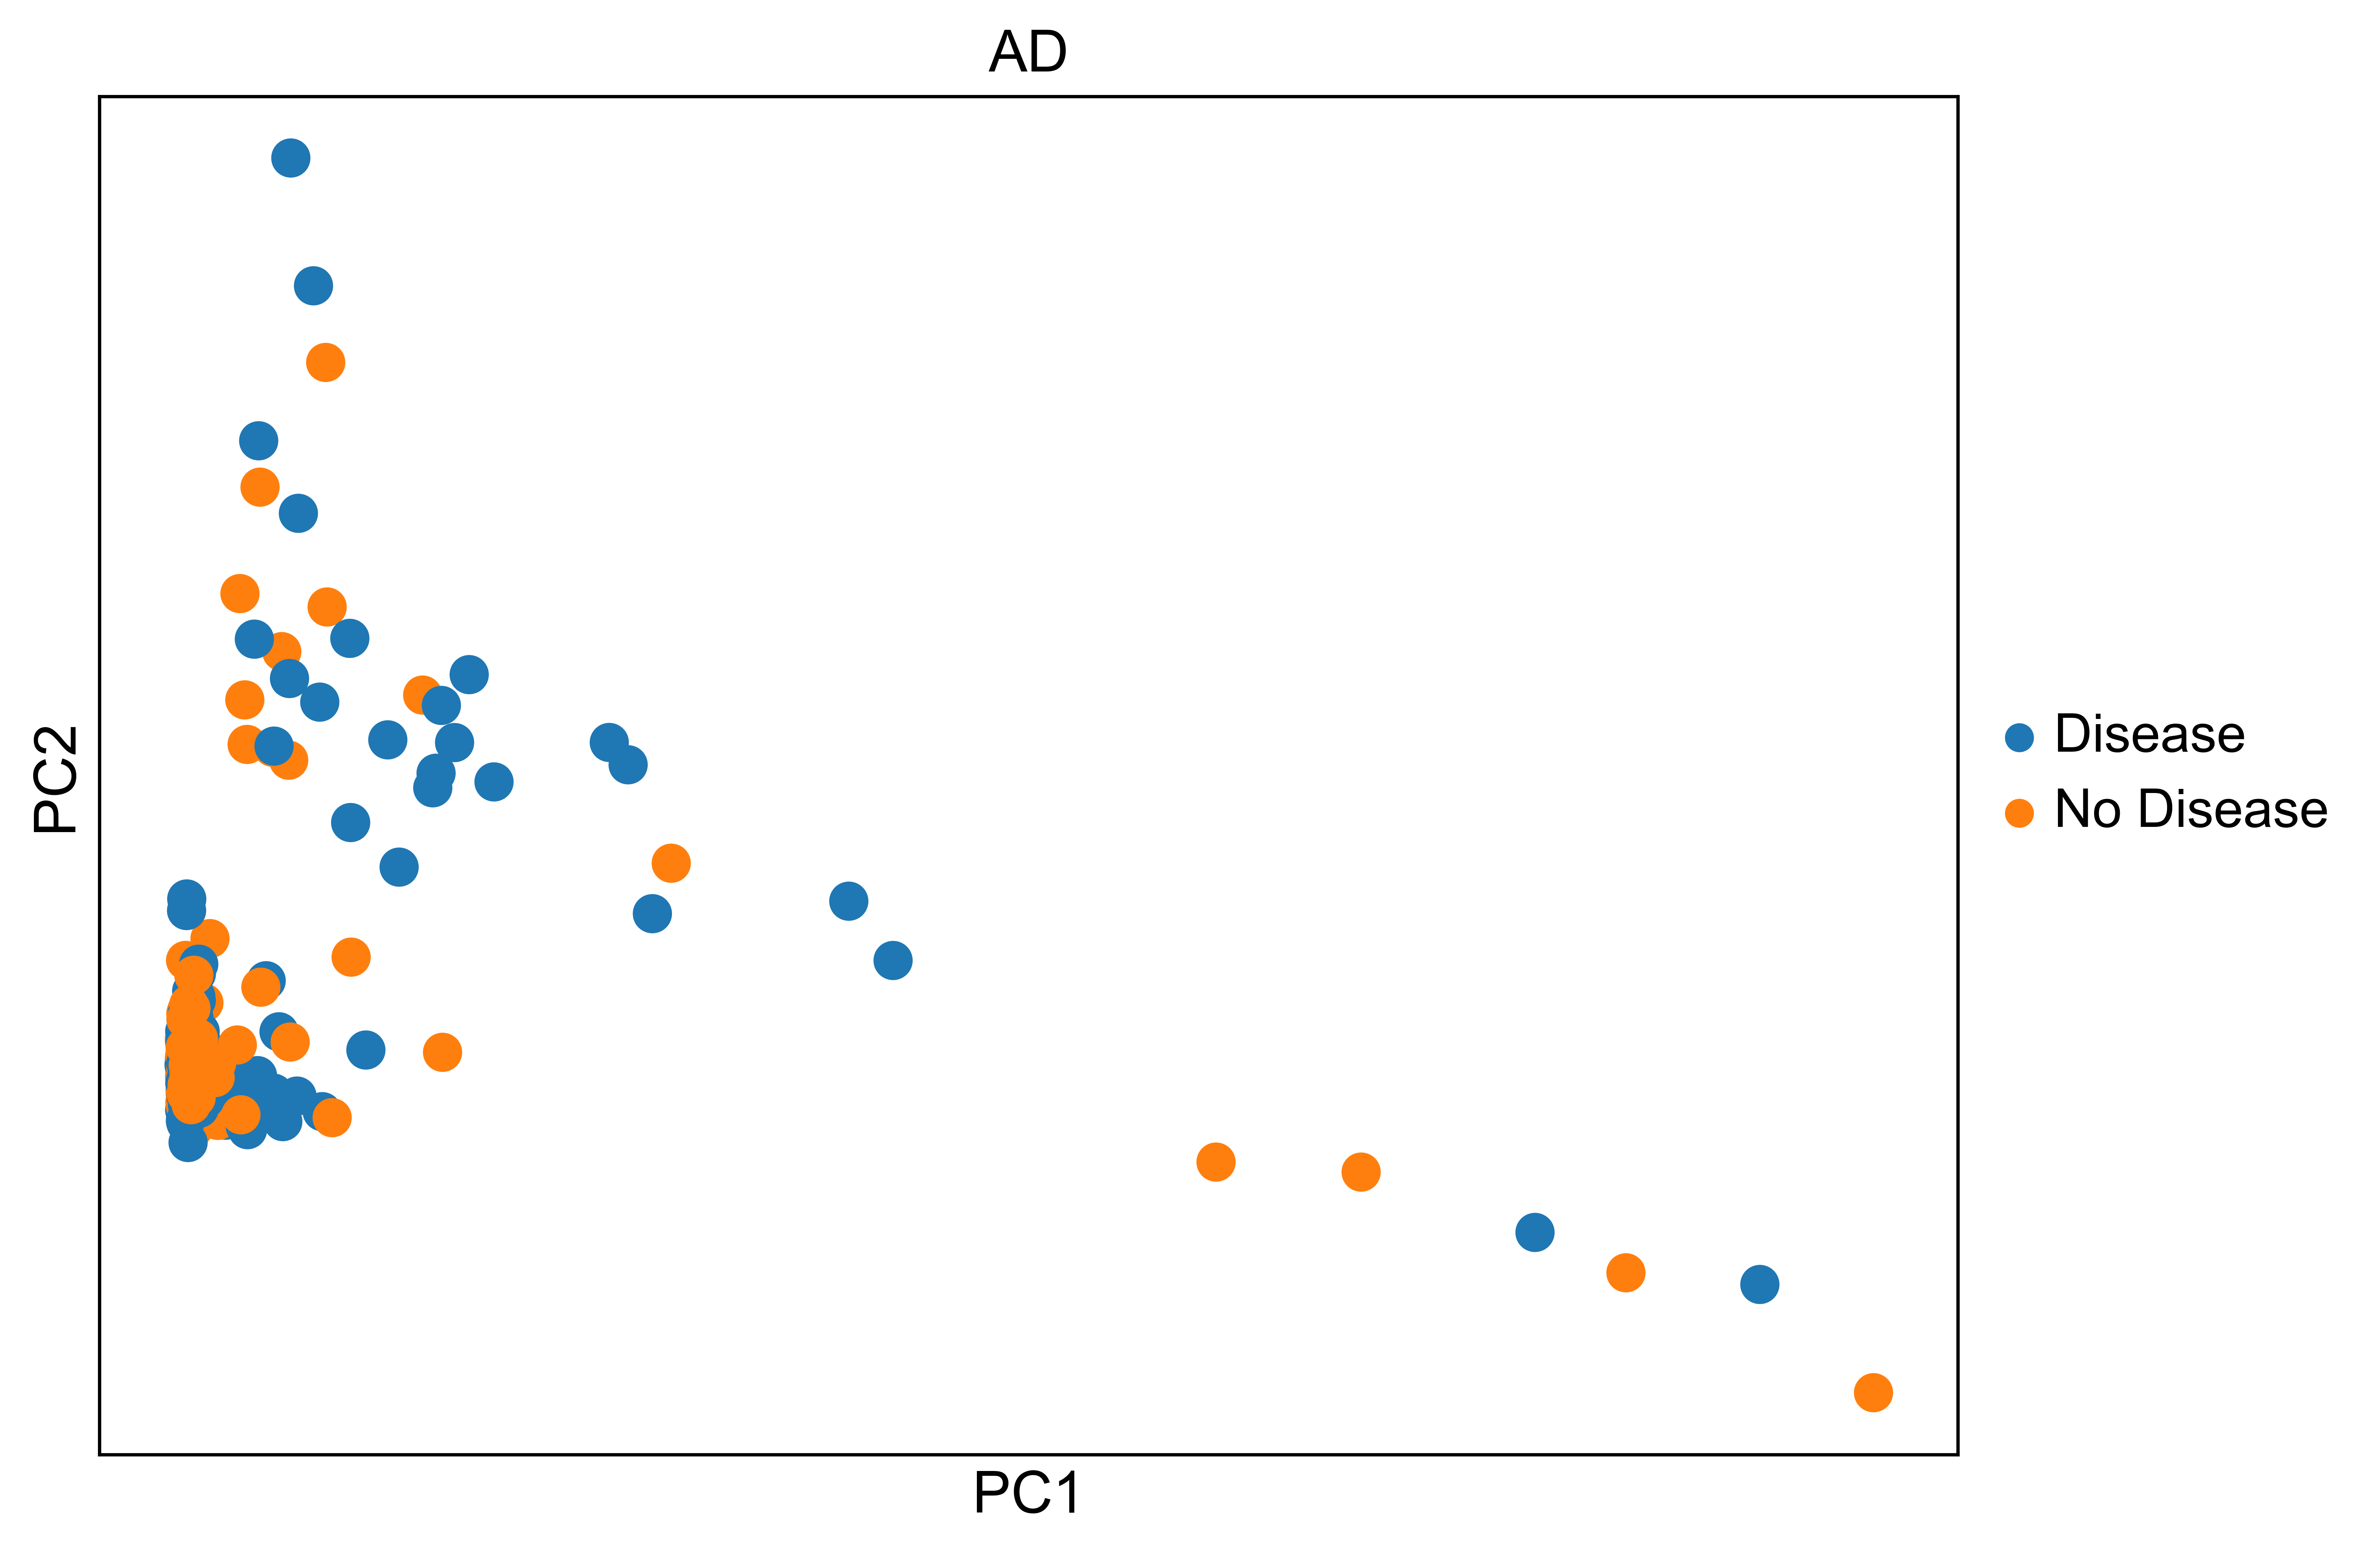

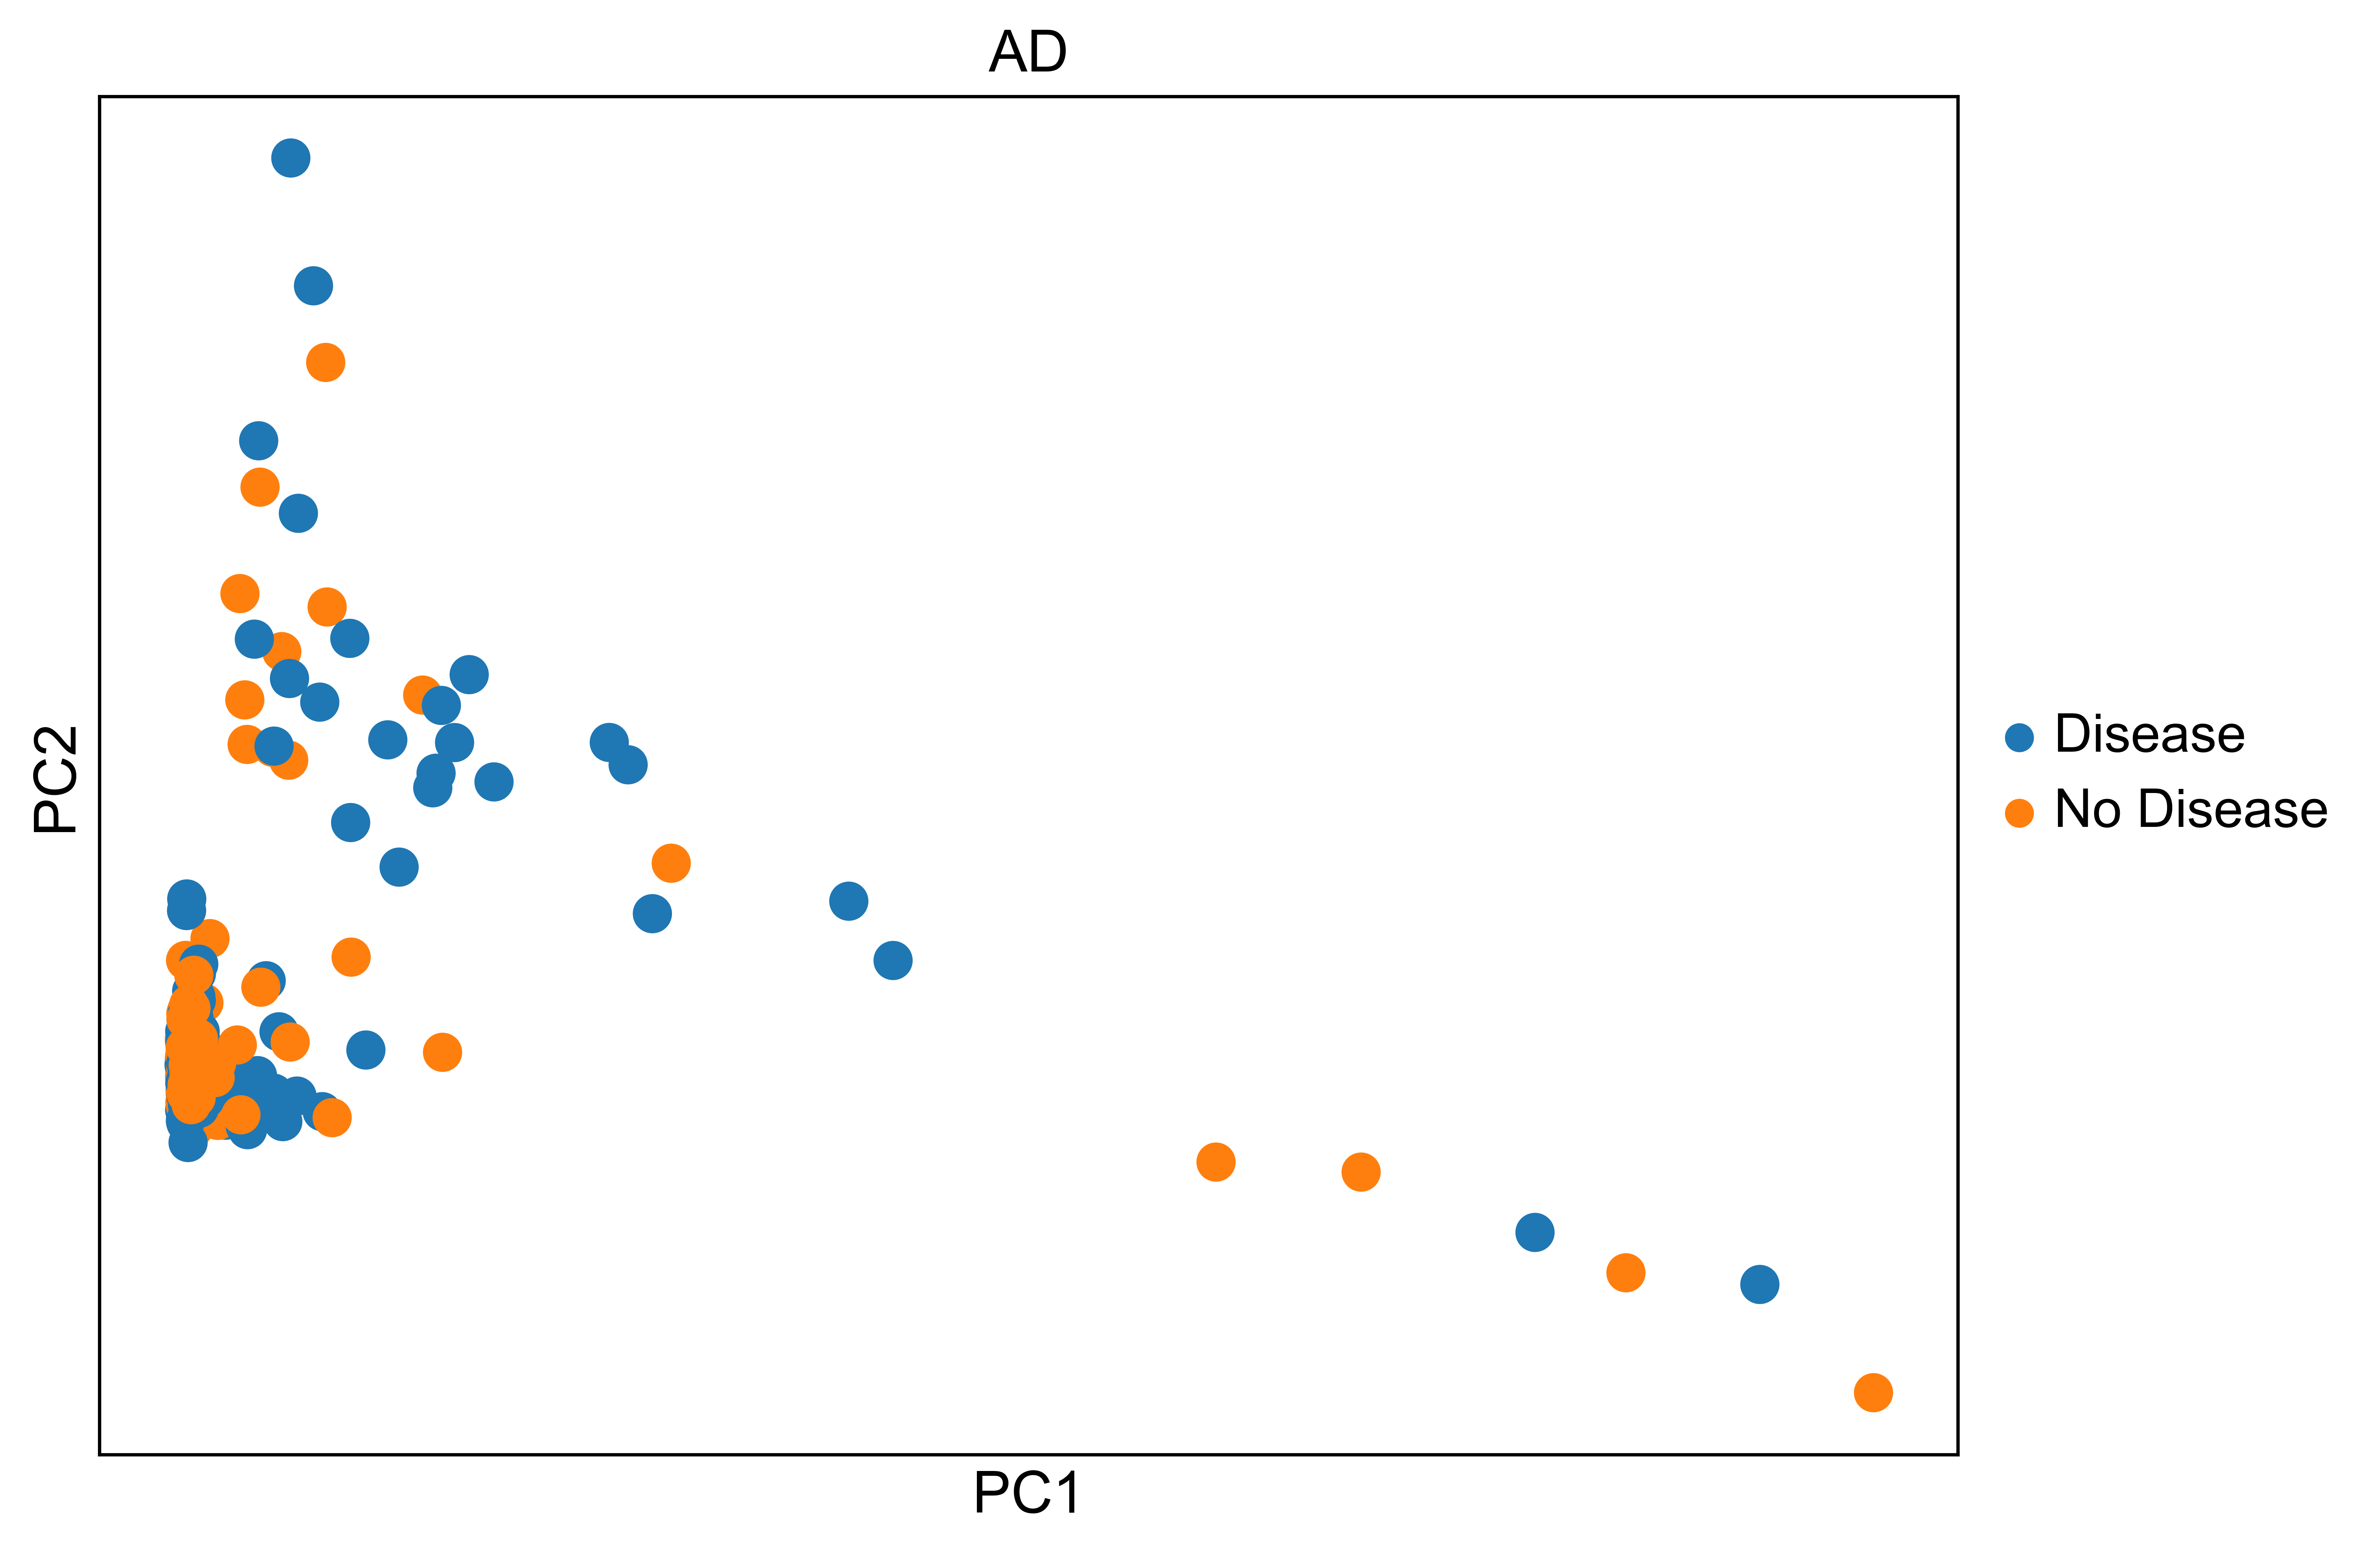

In [43]:
sc.set_figure_params(dpi=400, figsize=(8, 6))

# PCA for FPKM
sc.pp.pca(adata_toden_fpkm)

sc.pl.pca(adata_toden_fpkm, color=["AD"], save="_disease_pca_toden_fpkm.png")
# sc.pl.pca_variance_ratio(adata_toden_fpkm, log=True, save="_fpkm_variance.png")
sc.pl.pca(adata_toden_fpkm, color=["AD"], save="_pca_var_exp_toden_fpkm.png")

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


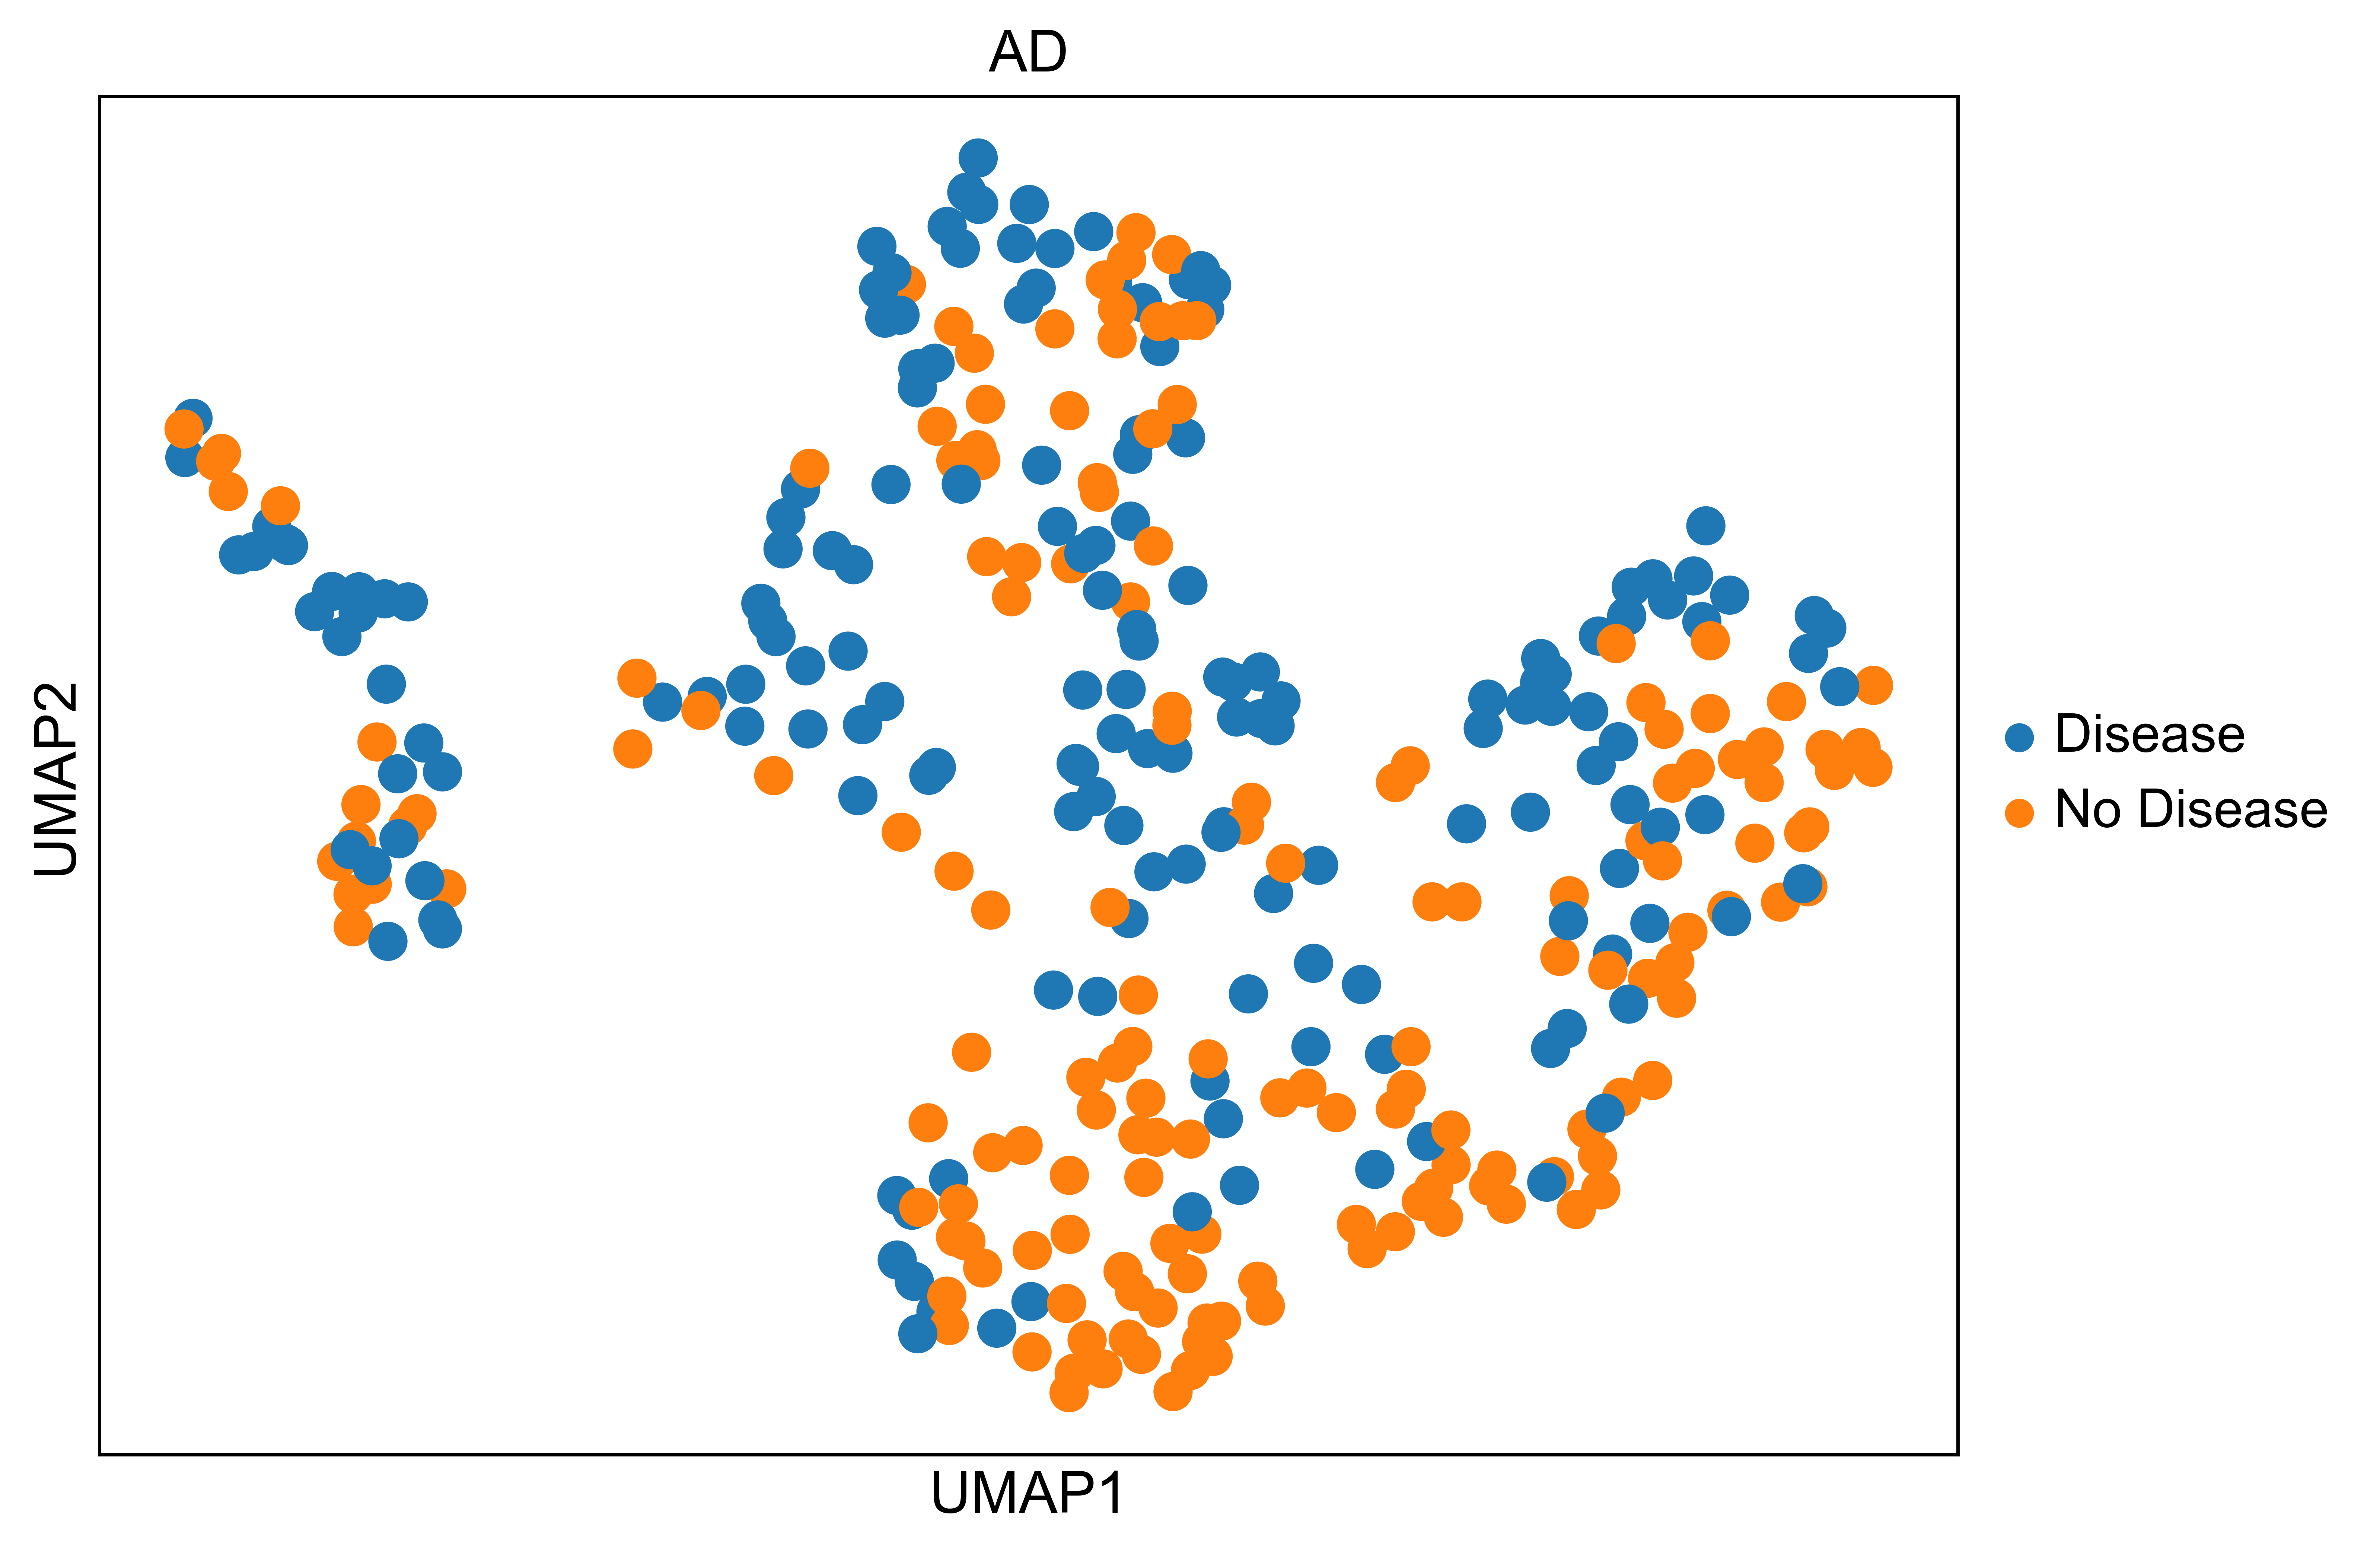

In [44]:
sc.pp.neighbors(adata_toden_fpkm)
sc.tl.umap(adata_toden_fpkm)
sc.pl.umap(adata_toden_fpkm, color=["AD"], save="_umap_toden_disease_fpkm.png")

In [126]:
adata_toden_fpkm = sc.read("../datasets/datasets_h5ad/fpkm/toden_fpkm.h5ad")

/opt/homebrew/Caskroom/miniconda/base/envs/CSE_283/lib/python3.11/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [127]:
adata_toden_fpkm

AnnData object with n_obs × n_vars = 334 × 56432
    obs: 'Run', 'Tissue', 'Age', 'PatientID', 'Ethnicity', 'Gender', 'Center', 'Disease', 'MMSE', 'CDR', 'Apoe.status', 'apoe_carrier', 'apoe_dose'

In [136]:
adata_toden_fpkm.obs["False_Pred"] = [True if x in ['SRR10192321', 'SRR10192252', 'SRR10192230', 'SRR10192205',
       'SRR10192170', 'SRR10192171', 'SRR10192487', 'SRR10192478',
       'SRR10192353', 'SRR10192329'] else False for x in adata_toden_fpkm.obs["Run"]]

In [137]:
adata_toden_fpkm.obs["False_Pred"].value_counts()

False_Pred
False    324
True      10
Name: count, dtype: int64

In [138]:
sc.pp.pca(adata_toden_fpkm)
sc.pp.neighbors(adata_toden_fpkm)
sc.tl.umap(adata_toden_fpkm)
sc.pl.umap(adata_toden_fpkm, color=["Disease", "False_Pred"])